In [2]:
!pip install pandas==0.25.3
!pip install numpy==1.17.3
!pip install Keras==2.3.1
!pip install tensorflow==2.0.0
!pip install tqdm==4.43.0
!pip install matplotlib==3.1.3

  Using cached pandas-0.25.3-cp36-cp36m-win_amd64.whl (9.0 MB)
  Using cached pytz-2020.1-py2.py3-none-any.whl (510 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.3
    Uninstalling numpy-1.19.3:
      Successfully uninstalled numpy-1.19.3
  Using cached Keras-2.3.1-py2.py3-none-any.whl (377 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Using cached PyYAML-5.3.1-cp36-cp36m-win_amd64.whl (215 kB)
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
  Using cached tensorflow-2.0.0-cp36-cp36m-win_amd64.whl (48.1 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
  Using cached tensorflow_estimator-2.0.1-py2.py3-none-any.whl (449 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.0.2-py3-none-any.whl (3.8 MB)
Processing c:\users\win10\appdata\loca

In [2]:
import re
import numpy as np

def create_unique_word_dict(text:list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({
            word: i
        })
    print(unique_word_dict)
    return unique_word_dict    

def text_preprocessing(
    text:list,
    punctuations = r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''',
    stop_words=['and', 'a', 'is', 'the', 'in', 'be', 'will']
    )->list:
    """
    A method to preproces text
    """
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x, "")

    # Removing words that have numbers in them
    text = re.sub(r'\w*\d\w*', '', text)

    # Removing digits
    text = re.sub(r'[0-9]+', '', text)

    # Cleaning the whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Setting every word to lower
    text = text.lower()

    # Converting all our text to a list 
    text = text.split(' ')

    # Droping empty strings
    text = [x for x in text if x!='']

    # Droping stop words
    text = [x for x in text if x not in stop_words]

    return text

# Functions to find the most similar word 
def euclidean(vec1:np.array, vec2:np.array) -> float:
    """
    A function to calculate the euclidean distance between two vectors
    """
    return np.sqrt(np.sum((vec1 - vec2)**2))

def find_similar(word:str, embedding_dict:dict, top_n=10)->list:
    """
    A method to find the most similar word based on the learnt embeddings
    """
    dist_dict = {}
    word_vector = embedding_dict.get(word, [])
    if len(word_vector) > 0:
        for key, value in embedding_dict.items():
            if key!=word:
                dist = euclidean(word_vector, value)
                dist_dict.update({
                    key: dist
                })

        return sorted(dist_dict.items(), key=lambda x: x[1])[0:top_n]       

98it [00:00, 8164.83it/s]

['future', 'king', 'prince']
......i..... 0 ....word.... future
......i..... 1 ....word.... king
......i..... 2 ....word.... prince
['daughter', 'princess']
......i..... 0 ....word.... daughter
......i..... 1 ....word.... princess
['son', 'prince']
......i..... 0 ....word.... son
......i..... 1 ....word.... prince
['only', 'man', 'can', 'king']
......i..... 0 ....word.... only
......i..... 1 ....word.... man
......i..... 2 ....word.... can
......i..... 3 ....word.... king
['only', 'woman', 'can', 'queen']
......i..... 0 ....word.... only
......i..... 1 ....word.... woman
......i..... 2 ....word.... can
......i..... 3 ....word.... queen
['princess', 'queen']
......i..... 0 ....word.... princess
......i..... 1 ....word.... queen
['queen', 'king', 'rule', 'realm']
......i..... 0 ....word.... queen
......i..... 1 ....word.... king
......i..... 2 ....word.... rule
......i..... 3 ....word.... realm
['prince', 'strong', 'man']
......i..... 0 ....word.... prince
......i..... 1 ....word.... str

Epoch 1/1000
98/98 [==============================] - 0s 429us/step - loss: 3.0668
Epoch 2/1000
98/98 [==============================] - 0s 10us/step - loss: 3.0659
Epoch 3/1000
98/98 [==============================] - 0s 10us/step - loss: 3.0649
Epoch 4/1000
98/98 [==============================] - 0s 10us/step - loss: 3.0640
Epoch 5/1000
98/98 [==============================] - 0s 10us/step - loss: 3.0630
Epoch 6/1000
98/98 [==============================] - 0s 20us/step - loss: 3.0621
Epoch 7/1000
98/98 [==============================] - 0s 10us/step - loss: 3.0611
Epoch 8/1000
98/98 [==============================] - 0s 10us/step - loss: 3.0602
Epoch 9/1000
98/98 [==============================] - 0s 10us/step - loss: 3.0593
Epoch 10/1000
98/98 [==============================] - 0s 10us/step - loss: 3.0583
Epoch 11/1000
98/98 [==============================] - 0s 10us/step - loss: 3.0574
Epoch 12/1000
98/98 [==============================] - 0s 10us/step - loss: 3.0565
Epoch 13/100

Epoch 100/1000
98/98 [==============================] - 0s 10us/step - loss: 2.9832
Epoch 101/1000
98/98 [==============================] - 0s 10us/step - loss: 2.9824
Epoch 102/1000
98/98 [==============================] - 0s 10us/step - loss: 2.9816
Epoch 103/1000
98/98 [==============================] - 0s 10us/step - loss: 2.9808
Epoch 104/1000
98/98 [==============================] - 0s 10us/step - loss: 2.9800
Epoch 105/1000
98/98 [==============================] - 0s 10us/step - loss: 2.9793
Epoch 106/1000
98/98 [==============================] - 0s 10us/step - loss: 2.9785
Epoch 107/1000
98/98 [==============================] - 0s 10us/step - loss: 2.9777
Epoch 108/1000
98/98 [==============================] - 0s 10us/step - loss: 2.9769
Epoch 109/1000
98/98 [==============================] - 0s 10us/step - loss: 2.9761
Epoch 110/1000
98/98 [==============================] - 0s 10us/step - loss: 2.9753
Epoch 111/1000
98/98 [==============================] - 0s 10us/step - loss:

Epoch 198/1000
98/98 [==============================] - 0s 10us/step - loss: 2.9031
Epoch 199/1000
98/98 [==============================] - 0s 10us/step - loss: 2.9022
Epoch 200/1000
98/98 [==============================] - 0s 10us/step - loss: 2.9013
Epoch 201/1000
98/98 [==============================] - 0s 10us/step - loss: 2.9005
Epoch 202/1000
98/98 [==============================] - 0s 10us/step - loss: 2.8996
Epoch 203/1000
98/98 [==============================] - 0s 10us/step - loss: 2.8987
Epoch 204/1000
98/98 [==============================] - 0s 10us/step - loss: 2.8979
Epoch 205/1000
98/98 [==============================] - 0s 10us/step - loss: 2.8970
Epoch 206/1000
98/98 [==============================] - 0s 10us/step - loss: 2.8961
Epoch 207/1000
98/98 [==============================] - 0s 10us/step - loss: 2.8953
Epoch 208/1000
98/98 [==============================] - 0s 0us/step - loss: 2.8944
Epoch 209/1000
98/98 [==============================] - 0s 10us/step - loss: 

Epoch 296/1000
98/98 [==============================] - 0s 10us/step - loss: 2.8136
Epoch 297/1000
98/98 [==============================] - 0s 10us/step - loss: 2.8126
Epoch 298/1000
98/98 [==============================] - 0s 10us/step - loss: 2.8117
Epoch 299/1000
98/98 [==============================] - 0s 10us/step - loss: 2.8107
Epoch 300/1000
98/98 [==============================] - 0s 20us/step - loss: 2.8098
Epoch 301/1000
98/98 [==============================] - 0s 20us/step - loss: 2.8088
Epoch 302/1000
98/98 [==============================] - 0s 10us/step - loss: 2.8079
Epoch 303/1000
98/98 [==============================] - 0s 10us/step - loss: 2.8069
Epoch 304/1000
98/98 [==============================] - 0s 10us/step - loss: 2.8059
Epoch 305/1000
98/98 [==============================] - 0s 10us/step - loss: 2.8050
Epoch 306/1000
98/98 [==============================] - 0s 10us/step - loss: 2.8040
Epoch 307/1000
98/98 [==============================] - 0s 10us/step - loss:

Epoch 394/1000
98/98 [==============================] - 0s 10us/step - loss: 2.7179
Epoch 395/1000
98/98 [==============================] - 0s 10us/step - loss: 2.7169
Epoch 396/1000
98/98 [==============================] - 0s 10us/step - loss: 2.7159
Epoch 397/1000
98/98 [==============================] - 0s 20us/step - loss: 2.7149
Epoch 398/1000
98/98 [==============================] - 0s 10us/step - loss: 2.7139
Epoch 399/1000
98/98 [==============================] - 0s 10us/step - loss: 2.7130
Epoch 400/1000
98/98 [==============================] - 0s 0us/step - loss: 2.7120
Epoch 401/1000
98/98 [==============================] - 0s 10us/step - loss: 2.7110
Epoch 402/1000
98/98 [==============================] - 0s 10us/step - loss: 2.7100
Epoch 403/1000
98/98 [==============================] - 0s 10us/step - loss: 2.7091
Epoch 404/1000
98/98 [==============================] - 0s 10us/step - loss: 2.7081
Epoch 405/1000
98/98 [==============================] - 0s 10us/step - loss: 

Epoch 492/1000
98/98 [==============================] - 0s 10us/step - loss: 2.6268
Epoch 493/1000
98/98 [==============================] - 0s 10us/step - loss: 2.6259
Epoch 494/1000
98/98 [==============================] - 0s 10us/step - loss: 2.6251
Epoch 495/1000
98/98 [==============================] - 0s 10us/step - loss: 2.6242
Epoch 496/1000
98/98 [==============================] - 0s 10us/step - loss: 2.6234
Epoch 497/1000
98/98 [==============================] - 0s 10us/step - loss: 2.6225
Epoch 498/1000
98/98 [==============================] - 0s 10us/step - loss: 2.6217
Epoch 499/1000
98/98 [==============================] - 0s 10us/step - loss: 2.6209
Epoch 500/1000
98/98 [==============================] - 0s 10us/step - loss: 2.6200
Epoch 501/1000
98/98 [==============================] - 0s 10us/step - loss: 2.6192
Epoch 502/1000
98/98 [==============================] - 0s 10us/step - loss: 2.6183
Epoch 503/1000
98/98 [==============================] - 0s 0us/step - loss: 

Epoch 590/1000
98/98 [==============================] - 0s 10us/step - loss: 2.5518
Epoch 591/1000
98/98 [==============================] - 0s 10us/step - loss: 2.5511
Epoch 592/1000
98/98 [==============================] - 0s 10us/step - loss: 2.5504
Epoch 593/1000
98/98 [==============================] - 0s 10us/step - loss: 2.5497
Epoch 594/1000
98/98 [==============================] - 0s 10us/step - loss: 2.5491
Epoch 595/1000
98/98 [==============================] - 0s 10us/step - loss: 2.5484
Epoch 596/1000
98/98 [==============================] - 0s 10us/step - loss: 2.5477
Epoch 597/1000
98/98 [==============================] - 0s 10us/step - loss: 2.5470
Epoch 598/1000
98/98 [==============================] - 0s 20us/step - loss: 2.5464
Epoch 599/1000
98/98 [==============================] - 0s 10us/step - loss: 2.5457
Epoch 600/1000
98/98 [==============================] - 0s 10us/step - loss: 2.5451
Epoch 601/1000
98/98 [==============================] - 0s 10us/step - loss:

Epoch 688/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4925
Epoch 689/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4919
Epoch 690/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4914
Epoch 691/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4909
Epoch 692/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4903
Epoch 693/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4898
Epoch 694/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4893
Epoch 695/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4887
Epoch 696/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4882
Epoch 697/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4877
Epoch 698/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4872
Epoch 699/1000
98/98 [==============================] - 0s 10us/step - loss:

Epoch 786/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4457
Epoch 787/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4453
Epoch 788/1000
98/98 [==============================] - 0s 20us/step - loss: 2.4448
Epoch 789/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4444
Epoch 790/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4440
Epoch 791/1000
98/98 [==============================] - 0s 20us/step - loss: 2.4436
Epoch 792/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4432
Epoch 793/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4428
Epoch 794/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4423
Epoch 795/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4419
Epoch 796/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4415
Epoch 797/1000
98/98 [==============================] - 0s 10us/step - loss:

Epoch 884/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4093
Epoch 885/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4090
Epoch 886/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4086
Epoch 887/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4083
Epoch 888/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4080
Epoch 889/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4077
Epoch 890/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4073
Epoch 891/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4070
Epoch 892/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4067
Epoch 893/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4064
Epoch 894/1000
98/98 [==============================] - 0s 10us/step - loss: 2.4061
Epoch 895/1000
98/98 [==============================] - 0s 10us/step - loss:

Epoch 982/1000
98/98 [==============================] - 0s 20us/step - loss: 2.3812
Epoch 983/1000
98/98 [==============================] - 0s 10us/step - loss: 2.3809
Epoch 984/1000
98/98 [==============================] - 0s 10us/step - loss: 2.3807
Epoch 985/1000
98/98 [==============================] - 0s 10us/step - loss: 2.3804
Epoch 986/1000
98/98 [==============================] - 0s 10us/step - loss: 2.3802
Epoch 987/1000
98/98 [==============================] - 0s 10us/step - loss: 2.3799
Epoch 988/1000
98/98 [==============================] - 0s 10us/step - loss: 2.3797
Epoch 989/1000
98/98 [==============================] - 0s 10us/step - loss: 2.3794
Epoch 990/1000
98/98 [==============================] - 0s 10us/step - loss: 2.3792
Epoch 991/1000
98/98 [==============================] - 0s 10us/step - loss: 2.3789
Epoch 992/1000
98/98 [==============================] - 0s 0us/step - loss: 2.3787
Epoch 993/1000
98/98 [==============================] - 0s 10us/step - loss: 

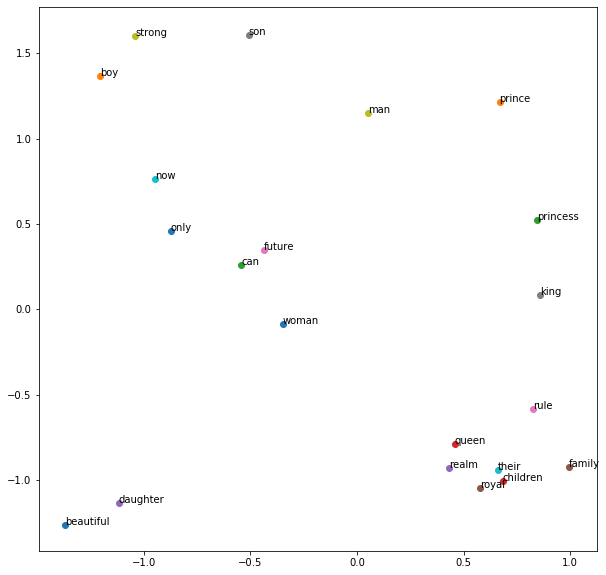

In [68]:
import itertools
import pandas as pd
import numpy as np
import re
import os
from tqdm import tqdm

# Drawing the embeddings
import matplotlib.pyplot as plt

# Deep learning: 
from keras.models import Input, Model
from keras.layers import Dense

from scipy import sparse

# Custom functions
#from utility import text_preprocessing, create_unique_word_dict

# Reading the text from the input folder
texts = pd.read_csv('input/sample.csv')
texts = [x for x in texts['text']]

# Defining the window for context
window = 2

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []

for text in texts:

    # Cleaning the text
    text = text_preprocessing(text)
    print(text)
    # Appending to the all text list
    all_text += text 

    # Creating a context dictionary
    for i, word in enumerate(text):
        print("......i....." ,i,"....word....",word)
        for w in range(3):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text): 
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words    
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])

                
print("word list " , word_lists)
unique_word_dict = create_unique_word_dict(all_text)
print("unique_word_dict",unique_word_dict)

# Defining the number of features (unique words)
n_words = len(unique_word_dict)

# Getting all the unique words 
words = list(unique_word_dict.keys())

print("words",words)

# Creating the X and Y matrices using one hot encoding
X = []
Y = []

for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])
    print("......i....." ,i,"....word_list....",word_list , "word_list[0]",word_list[0],"word_list[1] ",word_list[1])
    # Creating the placeholders   
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words 
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

# Converting the matrices into a sparse format because the vast majority of the data are 0s
X = sparse.csr_matrix(X)
Y = sparse.csr_matrix(Y)

# Defining the size of the embedding
embed_size = 2

# Defining the neural network
inp = Input(shape=(X.shape[1],))
x = Dense(units=embed_size, activation='linear')(inp)
x = Dense(units=Y.shape[1], activation='softmax')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

# Optimizing the network weights
model.fit(
    x=X, 
    y=Y, 
    batch_size=256,
    epochs=1000
    )

# Obtaining the weights from the neural network. 
# These are the so called word embeddings

# The input layer 
weights = model.get_weights()[0]

# Creating a dictionary to store the embeddings in. The key is a unique word and 
# the value is the numeric vector
embedding_dict = {}
for word in words: 
    embedding_dict.update({
        word: weights[unique_word_dict.get(word)]
        })

# Ploting the embeddings
plt.figure(figsize=(10, 10))
for word in list(unique_word_dict.keys()):
    coord = embedding_dict.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))       

# Saving the embedding vector to a txt file
try:
    os.mkdir(f'{os.getcwd()}\\output')        
except Exception as e:
    print(f'Cannot create output folder: {e}')

with open(f'{os.getcwd()}\\output\\embedding.txt', 'w') as f:
    for key, value in embedding_dict.items():
        try:
            f.write(f'{key}: {value}\n')   
        except Exception as e:
            print(f'Cannot write word {key} to dict: {e}') 

In [69]:
embedding_dict

{'beautiful': array([-1.3688022, -1.2648398], dtype=float32),
 'boy': array([-1.2045977,  1.3686044], dtype=float32),
 'can': array([-0.5418091 ,  0.26029423], dtype=float32),
 'children': array([ 0.6832872, -1.0086254], dtype=float32),
 'daughter': array([-1.1178044, -1.1369839], dtype=float32),
 'family': array([ 0.9929922, -0.9225423], dtype=float32),
 'future': array([-0.43754777,  0.3495058 ], dtype=float32),
 'king': array([0.8600612 , 0.08342463], dtype=float32),
 'man': array([0.05348093, 1.1474305 ], dtype=float32),
 'now': array([-0.94651306,  0.7657763 ], dtype=float32),
 'only': array([-0.8729304 ,  0.46015522], dtype=float32),
 'prince': array([0.6690954, 1.212434 ], dtype=float32),
 'princess': array([0.8468873, 0.5226464], dtype=float32),
 'queen': array([ 0.45890674, -0.7914091 ], dtype=float32),
 'realm': array([ 0.43352002, -0.9279783 ], dtype=float32),
 'royal': array([ 0.57931876, -1.0499104 ], dtype=float32),
 'rule': array([ 0.82716703, -0.5857244 ], dtype=float32

In [66]:
model.get_weights()[0]

array([[-0.4522477 ],
       [-1.2182469 ],
       [-0.2559153 ],
       [ 1.1059917 ],
       [-0.18299527],
       [ 1.2638413 ],
       [-0.37547705],
       [ 0.23008995],
       [-0.5719701 ],
       [-0.95362383],
       [-0.46083274],
       [-0.5689876 ],
       [-0.63507533],
       [ 0.5916492 ],
       [ 1.2399746 ],
       [ 1.1080786 ],
       [ 0.90944767],
       [-1.4457749 ],
       [-1.5976491 ],
       [ 1.5208826 ],
       [-0.28549275]], dtype=float32)

In [52]:
X.shape[1]

21

In [53]:
Y.shape[1]

21

In [39]:
n_words

21

In [38]:
unique_word_dict

{'beautiful': 0,
 'boy': 1,
 'can': 2,
 'children': 3,
 'daughter': 4,
 'family': 5,
 'future': 6,
 'king': 7,
 'man': 8,
 'now': 9,
 'only': 10,
 'prince': 11,
 'princess': 12,
 'queen': 13,
 'realm': 14,
 'royal': 15,
 'rule': 16,
 'son': 17,
 'strong': 18,
 'their': 19,
 'woman': 20}

In [49]:
len(word_lists)

98

In [35]:
[['future', 'king'], ['future', 'prince'], ['king', 'prince'], ['king', 'future'], 
  ['prince', 'king'], ['prince', 'future'], ['daughter', 'princess'], ['princess', 'daughter'],
  ['son', 'prince'], ['prince', 'son'], ['only', 'man'], ['only', 'can'], ['only', 'king'], ['man', 'can'],
  ['man', 'only'], ['man', 'king'], ['can', 'king'], ['can', 'man'], ['can', 'only'], ['king', 'can'], ['king', 'man'],
  ['king', 'only'], ['only', 'woman'], ['only', 'can'], ['only', 'queen'], ['woman', 'can'], ['woman', 'only'], 
  ['woman', 'queen'], ['can', 'queen'], ['can', 'woman'], ['can', 'only'], ['queen', 'can'], ['queen', 'woman'], 
  ['queen', 'only'], ['princess', 'queen'], ['queen', 'princess'], ['queen', 'king'], ['queen', 'rule'],
  ['queen', 'realm'], ['king', 'rule'], ['king', 'queen'], ['king', 'realm'], ['rule', 'realm'], 
  ['rule', 'king'], ['rule', 'queen'], ['realm', 'rule'], ['realm', 'king'], ['realm', 'queen'], ['prince', 'strong'], 
  ['prince', 'man'], ['strong', 'man'], ['strong', 'prince'], ['man', 'strong'], ['man', 'prince'], 
  ['princess', 'beautiful'], ['princess', 'woman'], ['beautiful', 'woman'], ['beautiful', 'princess'],
  ['woman', 'beautiful'], ['woman', 'princess'], ['royal', 'family'], ['royal', 'king'], ['royal', 'queen'], 
  ['family', 'king'], ['family', 'royal'], ['family', 'queen'], ['family', 'their'], ['king', 'queen'], 
  ['king', 'family'], ['king', 'their'], ['king', 'royal'], ['king', 'children'], ['queen', 'their'], ['queen', 'king'],
  ['queen', 'children'], ['queen', 'family'], ['queen', 'royal'], ['their', 'children'], ['their', 'queen'],
  ['their', 'king'], ['their', 'family'], ['children', 'their'], ['children', 'queen'], ['children', 'king'],
  ['prince', 'only'], ['prince', 'boy'], ['prince', 'now'], ['only', 'boy'], ['only', 'prince'], ['only', 'now'],
  ['boy', 'now'], ['boy', 'only'], ['boy', 'prince'], ['now', 'boy'], ['now', 'only'], ['now', 'prince'], 
  ['boy', 'man'], ['man', 'boy']]

['The future king is the prince',
 'Daughter is the princess ',
 'Son is the prince',
 'Only a man can be a king ',
 'Only a woman can be a queen',
 'The princess will be a queen',
 'Queen and king rule the realm',
 'The prince is a strong man',
 'The princess is a beautiful woman ',
 'The royal family is the king and queen and their children',
 'Prince is only a boy now',
 'A boy will be a man']

In [21]:
!pip install nltk

Processing c:\users\win10\appdata\local\pip\cache\wheels\de\5e\42\64abaeca668161c3e2cecc24f864a8fc421e3d07a104fc8a51\nltk-3.5-py3-none-any.whl


In [30]:
from nltk.corpus import brown
model = gensim.models.Word2Vec(brown.sents())

NameError: name 'gensim' is not defined

In [31]:
from gensim.models import Word2Vec
from nltk.corpus import brown, movie_reviews, treebank
b = Word2Vec(brown.sents())
b.vector_size()

TypeError: 'int' object is not callable

In [ ]:
from nltk.corpus import brown
model = gensim.models.Word2Vec(brown.sents())

In [ ]:
model.save('brown.embedding')
new_model = gensim.models.Word2Vec.load('brown.embedding')

In [18]:
import gensim

ModuleNotFoundError: No module named 'gensim'

In [13]:
 [['future', 'king'], ['future', 'prince'], ['king', 'prince'], ['king', 'future'], 
  ['prince', 'king'], ['prince', 'future'], ['daughter', 'princess'], ['princess', 'daughter'],
  ['son', 'prince'], ['prince', 'son'], ['only', 'man'], ['only', 'can'], ['only', 'king'], ['man', 'can'],
  ['man', 'only'], ['man', 'king'], ['can', 'king'], ['can', 'man'], ['can', 'only'], ['king', 'can'], ['king', 'man'],
  ['king', 'only'], ['only', 'woman'], ['only', 'can'], ['only', 'queen'], ['woman', 'can'], ['woman', 'only'], 
  ['woman', 'queen'], ['can', 'queen'], ['can', 'woman'], ['can', 'only'], ['queen', 'can'], ['queen', 'woman'], 
  ['queen', 'only'], ['princess', 'queen'], ['queen', 'princess'], ['queen', 'king'], ['queen', 'rule'],
  ['queen', 'realm'], ['king', 'rule'], ['king', 'queen'], ['king', 'realm'], ['rule', 'realm'], 
  ['rule', 'king'], ['rule', 'queen'], ['realm', 'rule'], ['realm', 'king'], ['realm', 'queen'], ['prince', 'strong'], 
  ['prince', 'man'], ['strong', 'man'], ['strong', 'prince'], ['man', 'strong'], ['man', 'prince'], 
  ['princess', 'beautiful'], ['princess', 'woman'], ['beautiful', 'woman'], ['beautiful', 'princess'],
  ['woman', 'beautiful'], ['woman', 'princess'], ['royal', 'family'], ['royal', 'king'], ['royal', 'queen'], 
  ['family', 'king'], ['family', 'royal'], ['family', 'queen'], ['family', 'their'], ['king', 'queen'], 
  ['king', 'family'], ['king', 'their'], ['king', 'royal'], ['king', 'children'], ['queen', 'their'], ['queen', 'king'],
  ['queen', 'children'], ['queen', 'family'], ['queen', 'royal'], ['their', 'children'], ['their', 'queen'],
  ['their', 'king'], ['their', 'family'], ['children', 'their'], ['children', 'queen'], ['children', 'king'],
  ['prince', 'only'], ['prince', 'boy'], ['prince', 'now'], ['only', 'boy'], ['only', 'prince'], ['only', 'now'],
  ['boy', 'now'], ['boy', 'only'], ['boy', 'prince'], ['now', 'boy'], ['now', 'only'], ['now', 'prince'], 
  ['boy', 'man'], ['man', 'boy']]

1.0

In [17]:
model.get_weights()

[array([[ 1.2094697 , -1.7519492 , -0.58710396],
        [-0.69742936, -0.8224115 ,  0.762515  ],
        [-1.0232257 , -0.99347407, -0.6290375 ],
        [-0.03148846,  0.861094  , -1.2489003 ],
        [ 0.5185555 , -1.0197939 , -1.1642642 ],
        [ 0.34528542,  0.4095648 , -1.4649962 ],
        [-1.29276   ,  0.80572814, -0.03398667],
        [ 0.40857503,  0.04271423, -0.2268797 ],
        [-0.80741733,  0.8518701 ,  1.1676799 ],
        [-1.5463994 ,  0.3928059 ,  0.8357471 ],
        [-0.37743744,  0.01945627,  0.8162782 ],
        [ 0.19316475, -0.22552669,  1.1549882 ],
        [ 0.99186873, -0.91034657,  0.60148233],
        [ 0.43138096, -0.24971391, -0.817542  ],
        [-0.96682817,  0.11788289, -1.4357525 ],
        [-0.37768555,  1.2125648 , -1.2955272 ],
        [-0.24098323,  0.6833078 , -1.21673   ],
        [-0.72854114,  0.79847366,  0.57885855],
        [-0.8282897 , -0.26234597,  1.4050348 ],
        [ 0.33650818,  1.3968124 , -1.0523984 ],
        [ 0.08888734

In [14]:
weights

array([[ 1.2094697 , -1.7519492 , -0.58710396],
       [-0.69742936, -0.8224115 ,  0.762515  ],
       [-1.0232257 , -0.99347407, -0.6290375 ],
       [-0.03148846,  0.861094  , -1.2489003 ],
       [ 0.5185555 , -1.0197939 , -1.1642642 ],
       [ 0.34528542,  0.4095648 , -1.4649962 ],
       [-1.29276   ,  0.80572814, -0.03398667],
       [ 0.40857503,  0.04271423, -0.2268797 ],
       [-0.80741733,  0.8518701 ,  1.1676799 ],
       [-1.5463994 ,  0.3928059 ,  0.8357471 ],
       [-0.37743744,  0.01945627,  0.8162782 ],
       [ 0.19316475, -0.22552669,  1.1549882 ],
       [ 0.99186873, -0.91034657,  0.60148233],
       [ 0.43138096, -0.24971391, -0.817542  ],
       [-0.96682817,  0.11788289, -1.4357525 ],
       [-0.37768555,  1.2125648 , -1.2955272 ],
       [-0.24098323,  0.6833078 , -1.21673   ],
       [-0.72854114,  0.79847366,  0.57885855],
       [-0.8282897 , -0.26234597,  1.4050348 ],
       [ 0.33650818,  1.3968124 , -1.0523984 ],
       [ 0.08888734, -0.6616554 ,  0.042

In [4]:
# Reading the text from the input folder
texts = pd.read_csv('input/sample.csv')
texts = [x for x in texts['text']]
texts

['The future king is the prince',
 'Daughter is the princess ',
 'Son is the prince',
 'Only a man can be a king ',
 'Only a woman can be a queen',
 'The princess will be a queen',
 'Queen and king rule the realm',
 'The prince is a strong man',
 'The princess is a beautiful woman ',
 'The royal family is the king and queen and their children',
 'Prince is only a boy now',
 'A boy will be a man']

In [9]:
# Defining the window for context
window = 2

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []

for text in texts:

    # Cleaning the text
    text = text_preprocessing(text)
    print(text)

    # Appending to the all text list
    all_text += text 

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text): 
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words    
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])

unique_word_dict = create_unique_word_dict(all_text)

# Defining the number of features (unique words)
n_words = len(unique_word_dict)

# Getting all the unique words 
words = list(unique_word_dict.keys())

# Creating the X and Y matrices using one hot encoding
X = []
Y = []

['future', 'king', 'prince']
['daughter', 'princess']
['son', 'prince']
['only', 'man', 'can', 'king']
['only', 'woman', 'can', 'queen']
['princess', 'queen']
['queen', 'king', 'rule', 'realm']
['prince', 'strong', 'man']
['princess', 'beautiful', 'woman']
['royal', 'family', 'king', 'queen', 'their', 'children']
['prince', 'only', 'boy', 'now']
['boy', 'man']
{'beautiful': 0, 'boy': 1, 'can': 2, 'children': 3, 'daughter': 4, 'family': 5, 'future': 6, 'king': 7, 'man': 8, 'now': 9, 'only': 10, 'prince': 11, 'princess': 12, 'queen': 13, 'realm': 14, 'royal': 15, 'rule': 16, 'son': 17, 'strong': 18, 'their': 19, 'woman': 20}


In [10]:
unique_word_dict.keys()

dict_keys(['beautiful', 'boy', 'can', 'children', 'daughter', 'family', 'future', 'king', 'man', 'now', 'only', 'prince', 'princess', 'queen', 'realm', 'royal', 'rule', 'son', 'strong', 'their', 'woman'])

In [7]:
word_lists

[['future', 'king'],
 ['future', 'prince'],
 ['king', 'prince'],
 ['king', 'future'],
 ['prince', 'king'],
 ['prince', 'future'],
 ['daughter', 'princess'],
 ['princess', 'daughter'],
 ['son', 'prince'],
 ['prince', 'son'],
 ['only', 'man'],
 ['only', 'can'],
 ['only', 'king'],
 ['man', 'can'],
 ['man', 'only'],
 ['man', 'king'],
 ['can', 'king'],
 ['can', 'man'],
 ['can', 'only'],
 ['king', 'can'],
 ['king', 'man'],
 ['king', 'only'],
 ['only', 'woman'],
 ['only', 'can'],
 ['only', 'queen'],
 ['woman', 'can'],
 ['woman', 'only'],
 ['woman', 'queen'],
 ['can', 'queen'],
 ['can', 'woman'],
 ['can', 'only'],
 ['queen', 'can'],
 ['queen', 'woman'],
 ['queen', 'only'],
 ['princess', 'queen'],
 ['queen', 'princess'],
 ['queen', 'king'],
 ['queen', 'rule'],
 ['queen', 'realm'],
 ['king', 'rule'],
 ['king', 'queen'],
 ['king', 'realm'],
 ['rule', 'realm'],
 ['rule', 'king'],
 ['rule', 'queen'],
 ['realm', 'rule'],
 ['realm', 'king'],
 ['realm', 'queen'],
 ['prince', 'strong'],
 ['prince', 'ma

In [21]:
for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    main_word_index = unique_word_dict.get(word_list[0])
    print("main_word_index",main_word_index)
    context_word_index = unique_word_dict.get(word_list[1])
    print("context_word_index",context_word_index)

    # Creating the placeholders   
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words 
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

# Converting the matrices into a sparse format because the vast majority of the data are 0s
X = sparse.csr_matrix(X)
Y = sparse.csr_matrix(Y)
X

0it [00:00, ?it/s]

main_word_index 6
context_word_index 7


AttributeError: append not found

In [17]:
n_words

21

In [18]:
X_row = np.zeros(n_words)
X_row

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [19]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
Y.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [9]:
weights

array([[ 0.48290667,  0.8457001 ,  0.59346896,  1.2645154 , -1.2040269 ,
         1.1573222 ],
       [ 0.73837304, -0.20747106,  0.4157775 , -1.1825156 ,  1.3830478 ,
        -0.05894116],
       [-0.5129488 , -0.6455666 ,  0.22340234, -0.2326535 ,  0.6847749 ,
         0.5590865 ],
       [-0.6766587 , -0.7023404 , -1.1072837 ,  0.59157366, -0.8064974 ,
        -0.5534737 ],
       [-0.8892283 ,  0.96314925, -0.19587861,  1.0056496 , -1.0038648 ,
         1.3950247 ],
       [-0.5153948 , -1.0223849 , -1.188952  ,  0.27847248, -0.77112186,
        -0.8921992 ],
       [ 1.2034631 , -1.1523337 , -1.4931266 ,  0.46258503,  0.99452   ,
        -1.2687634 ],
       [-1.1228006 ,  0.60329014, -0.13347368, -1.2324024 , -0.12903307,
        -0.8778439 ],
       [ 1.0579053 , -1.3727962 ,  0.79554003,  0.38659805,  0.41290584,
        -0.20482758],
       [ 1.0717387 , -0.9128558 ,  0.52586603, -0.40760133,  0.89914244,
         0.43862754],
       [ 0.58207464, -0.9047044 ,  0.25423622, -0.

In [1]:
import tensorflow as tf 
tf.__version__

'2.0.0'

In [ ]:
!pip install tensorflow==2.0.0